In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
n = [20, 40, 60, 80, 100]

fix = []
shuffle = []
fix_w = []
shuffle_w = []

#Fix
for num in n:
    df_results_fix = pd.read_csv(f'./results/Fix/data/data_fix_n{num}.csv')
    df_results_fix['rel_Profit_Performance'] = (df_results_fix.Sum_Profit / df_results_fix.Sum_Max_Possible_Profit)
    df_results_fix['rel_ETA_Performance'] = (df_results_fix.Sum_Min_Possible_ETA / df_results_fix.Sum_ETA)
    df_results_fix['n'] = num
    df_results_fix['ID'] =  ['F' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_fix['ALG'], df_results_fix['Optimum'])]
    fix.append(df_results_fix)
    df_results_fix.to_csv(f'./results/Fix/data/data_fix_n{num}.csv',index=False)

#Shuffle
for num in n:
    df_results_shuffle = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle['rel_Profit_Performance'] = (df_results_shuffle.Sum_Profit / df_results_shuffle.Sum_Max_Possible_Profit)
    df_results_shuffle['rel_ETA_Performance'] = (df_results_shuffle.Sum_Min_Possible_ETA / df_results_shuffle.Sum_ETA)
    df_results_shuffle['n'] = num
    df_results_shuffle['ID'] =  ['S' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_shuffle['ALG'], df_results_shuffle['Optimum'])]
    shuffle.append(df_results_shuffle)
    df_results_shuffle.to_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv',index=False)
    
#Waiting fix
for num in n:
    df_results_fix_w = pd.read_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv')
    df_results_fix_w['rel_Profit_Performance'] = (df_results_fix_w.Sum_Profit / df_results_fix_w.Sum_Max_Possible_Profit)
    df_results_fix_w['rel_ETA_Performance'] = (df_results_fix_w.Sum_Min_Possible_ETA / df_results_fix_w.Sum_ETA)
    df_results_fix_w['n'] = num
    df_results_fix_w['ID'] =  ['F' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_fix_w['ALG'], df_results_fix_w['Optimum'])]
    fix_w.append(df_results_fix_w)
    df_results_fix_w.to_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv',index=False)
#Waiting shuffle 
for num in n:
    df_results_shuffle_w = pd.read_csv(f'./results/Shuffle/data/data_shuffle_waiting_n{num}.csv')
    df_results_shuffle_w['rel_Profit_Performance'] = (df_results_shuffle_w.Sum_Profit / df_results_shuffle_w.Sum_Max_Possible_Profit)
    df_results_shuffle_w['rel_ETA_Performance'] = (df_results_shuffle_w.Sum_Min_Possible_ETA / df_results_shuffle_w.Sum_ETA)
    df_results_shuffle_w['n'] = num
    df_results_shuffle_w['ID'] =  ['S' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_shuffle_w['ALG'], df_results_shuffle_w['Optimum'])]
    shuffle_w.append(df_results_shuffle_w)
    df_results_shuffle_w.to_csv(f'./results/Shuffle/data/data_shuffle_waiting_n{num}.csv',index=False)

In [11]:
#FIX
summary_fix = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_fix = pd.read_csv(f'./results/Fix/data/data_fix_n{num}.csv')
    df_results_fix = df_results_fix.query("ID in ('F1P','F2P')")
    summary_fix = summary_fix.append(pd.concat([df_results_fix.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                       df_results_fix.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].min(),
                       df_results_fix.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].max()
                        ],axis=1, ignore_index=True))
    summary_fix['ID'] = summary_fix.index
    series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
    
summary_fix = pd.concat([series.reset_index(drop=True),summary_fix.reset_index(drop=True)], axis=1)
summary_fix = summary_fix.set_axis(['n=','avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA','avg_Blocking_Pairs',
                      'min_Profit_Performance', 'min_ETA_Performance','min_Blocking_Pairs',
                      'max_Profit_Performance','max_ETA_Performance','max_Blocking_Pairs','ID'], axis=1, inplace=False)

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/2554520145.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/2554520145.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_fix = summary_fix.append(pd.concat([df_results_fix.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/2554520145.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xjt

In [12]:
#SHUFFLE
summary_shuffle = pd.DataFrame()
series = pd.Series()


for num in n:
    df_results_shuffle = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle = df_results_shuffle.query("ID in ('S1P','S2P')")
    summary_shuffle = summary_shuffle.append(pd.concat([df_results_shuffle.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                       df_results_shuffle.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].min(),
                       df_results_shuffle.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].max()
                        ],axis=1, ignore_index=True))
    summary_shuffle['ID'] = summary_shuffle.index
    series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
    
summary_shuffle = pd.concat([series.reset_index(drop=True),summary_shuffle.reset_index(drop=True)], axis=1)
summary_shuffle = summary_shuffle.set_axis(['n=','avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA','avg_Blocking_Pairs',
                      'min_Profit_Performance', 'min_ETA_Performance','min_Blocking_Pairs',
                      'max_Profit_Performance','max_ETA_Performance','max_Blocking_Pairs','ID'], axis=1, inplace=False)

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1046292822.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1046292822.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_shuffle = summary_shuffle.append(pd.concat([df_results_shuffle.groupby('ID')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1046292822.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd

In [13]:
# FIX WAITING
summary_fix_w = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_fix_w = pd.read_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv')
    df_results_fix_w = df_results_fix_w.query("ID in ('F1P','F2P')")
    summary_fix_w = summary_fix_w.append(pd.concat([df_results_fix_w.groupby('ID')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA',
                                                         'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                                                    df_results_fix_w.groupby('ID')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                         'Blocking Pairs']].min(),
                                                    df_results_fix_w.groupby('ID')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                         'Blocking Pairs']].max()
                                                    ], axis=1, ignore_index=True))
    summary_fix_w['ID'] = summary_fix_w.index
    series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed

summary_fix_w = pd.concat([series.reset_index(drop=True), summary_fix_w.reset_index(drop=True)], axis=1)
summary_fix_w = summary_fix_w.set_axis(
    ['n=', 'avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA', 'avg_Blocking_Pairs',
     'min_Profit_Performance', 'min_ETA_Performance', 'min_Blocking_Pairs',
     'max_Profit_Performance', 'max_ETA_Performance', 'max_Blocking_Pairs', 'ID'], axis=1, inplace=False)

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1298337988.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1298337988.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_fix_w = summary_fix_w.append(pd.concat([df_results_fix_w.groupby('ID')[
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1298337988.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/1298337988.py:8: FutureWarning: The frame.append method is deprecated an

In [14]:
# SHUFFLE WAITING
summary_shuffle_w = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_shuffle_w = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle_w = df_results_shuffle_w.query("ID in ('S1P','S2P')")
    summary_shuffle_w = summary_shuffle_w.append(pd.concat([df_results_shuffle_w.groupby('ID')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA',
                                                             'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                                                            df_results_shuffle_w.groupby('ID')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                             'Blocking Pairs']].min(),
                                                            df_results_shuffle_w.groupby('ID')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                             'Blocking Pairs']].max()
                                                            ], axis=1, ignore_index=True))
    summary_shuffle_w['ID'] = summary_shuffle_w.index
    series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed

summary_shuffle_w = pd.concat([series.reset_index(drop=True), summary_shuffle_w.reset_index(drop=True)], axis=1)
summary_shuffle_w = summary_shuffle_w.set_axis(
    ['n=', 'avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA', 'avg_Blocking_Pairs',
     'min_Profit_Performance', 'min_ETA_Performance', 'min_Blocking_Pairs',
     'max_Profit_Performance', 'max_ETA_Performance', 'max_Blocking_Pairs', 'ID'], axis=1, inplace=False)

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/3370806209.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/3370806209.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_shuffle_w = summary_shuffle_w.append(pd.concat([df_results_shuffle_w.groupby('ID')[
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/3370806209.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_25293/3370806209.py:8: FutureWarning: The frame.append method is d

In [15]:
def _get_share_ax(share_var, axarr, row, col):
    if share_var=='row':
        if col > 0:
            return axarr[row, col-1]
        return None
    elif share_var=='col':
        if row > 0:
            return axarr[row-1, col]
        return None
    elif share_var and (col>0 or row>0):
        return axarr[0,0]
    return None

def subplots_with_row_titles(nrows, ncols, row_titles=None, row_title_kw=None, sharex=False, sharey=False, subplot_kw=None, grid_spec_kw=None, **fig_kw):
    """
    Creates a figure and array of axes with a title for each row.
    
    Parameters
    ----------
    nrows, ncols : int
        Number of rows/columns of the subplot grid
    row_titles : list, optional
        List of titles for each row. If included, there must be one title for each row.
    row_title_kw: dict, optional
        Dict with kewords passed to the `~matplotlib.Axis.set_title` function.
        A common use is row_title_kw={'fontsize': 24}
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.

        When subplots have a shared x-axis along a column, only the x tick
        labels of the bottom subplot are created. Similarly, when subplots
        have a shared y-axis along a row, only the y tick labels of the first
        column subplot are created. To later turn other subplots' ticklabels
        on, use `~matplotlib.axes.Axes.tick_params`.
    subplot_kw : dict, optional
        Dict with keywords passed to the
        `~matplotlib.figure.Figure.add_subplot` call used to create each
        subplot.
    gridspec_kw : dict, optional
        Dict with keywords passed to the `~matplotlib.gridspec.GridSpec`
        constructor used to create the grid the subplots are placed on.
    **fig_kw
        All additional keyword arguments are passed to the
        `.pyplot.figure` call.
    """
    if row_titles is not None and len(row_titles) != nrows:
        raise ValueError(f'If row_titles is specified, there must be one for each row. Got={row_titles}')
    if subplot_kw is None:
        subplot_kw = {}
    if row_title_kw is None:
        row_title_kw = {}
    if sharex not in {True, False, 'row', 'col'}:
        raise ValueError(f'sharex must be one of [True, False, "row", "col"]. Got={sharex}')
    if sharey not in {True, False, 'row', 'col'}:
        raise ValueError(f'sharey must be one of [True, False, "row", "col"]. Got={sharey}')
        
    fig, big_axes = plt.subplots(nrows, 1, **fig_kw)
    for (row, big_ax) in enumerate(big_axes):
        if row_titles is not None:
            big_ax.set_title(str(row_titles[row]), **row_title_kw)
        big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
        big_ax._frameon = False
        
    axarr = np.empty((nrows, ncols), dtype='O')
    for row in range(nrows):
        for col in range(ncols):
            sharex_ax = _get_share_ax(sharex, axarr, row, col)
            sharey_ax = _get_share_ax(sharex, axarr, row, col)
    
            ax= fig.add_subplot(nrows, ncols, row*ncols+col+1,
                                sharex=sharex_ax, sharey=sharey_ax, **subplot_kw)
            axarr[row, col] = ax
    return fig, axarr       

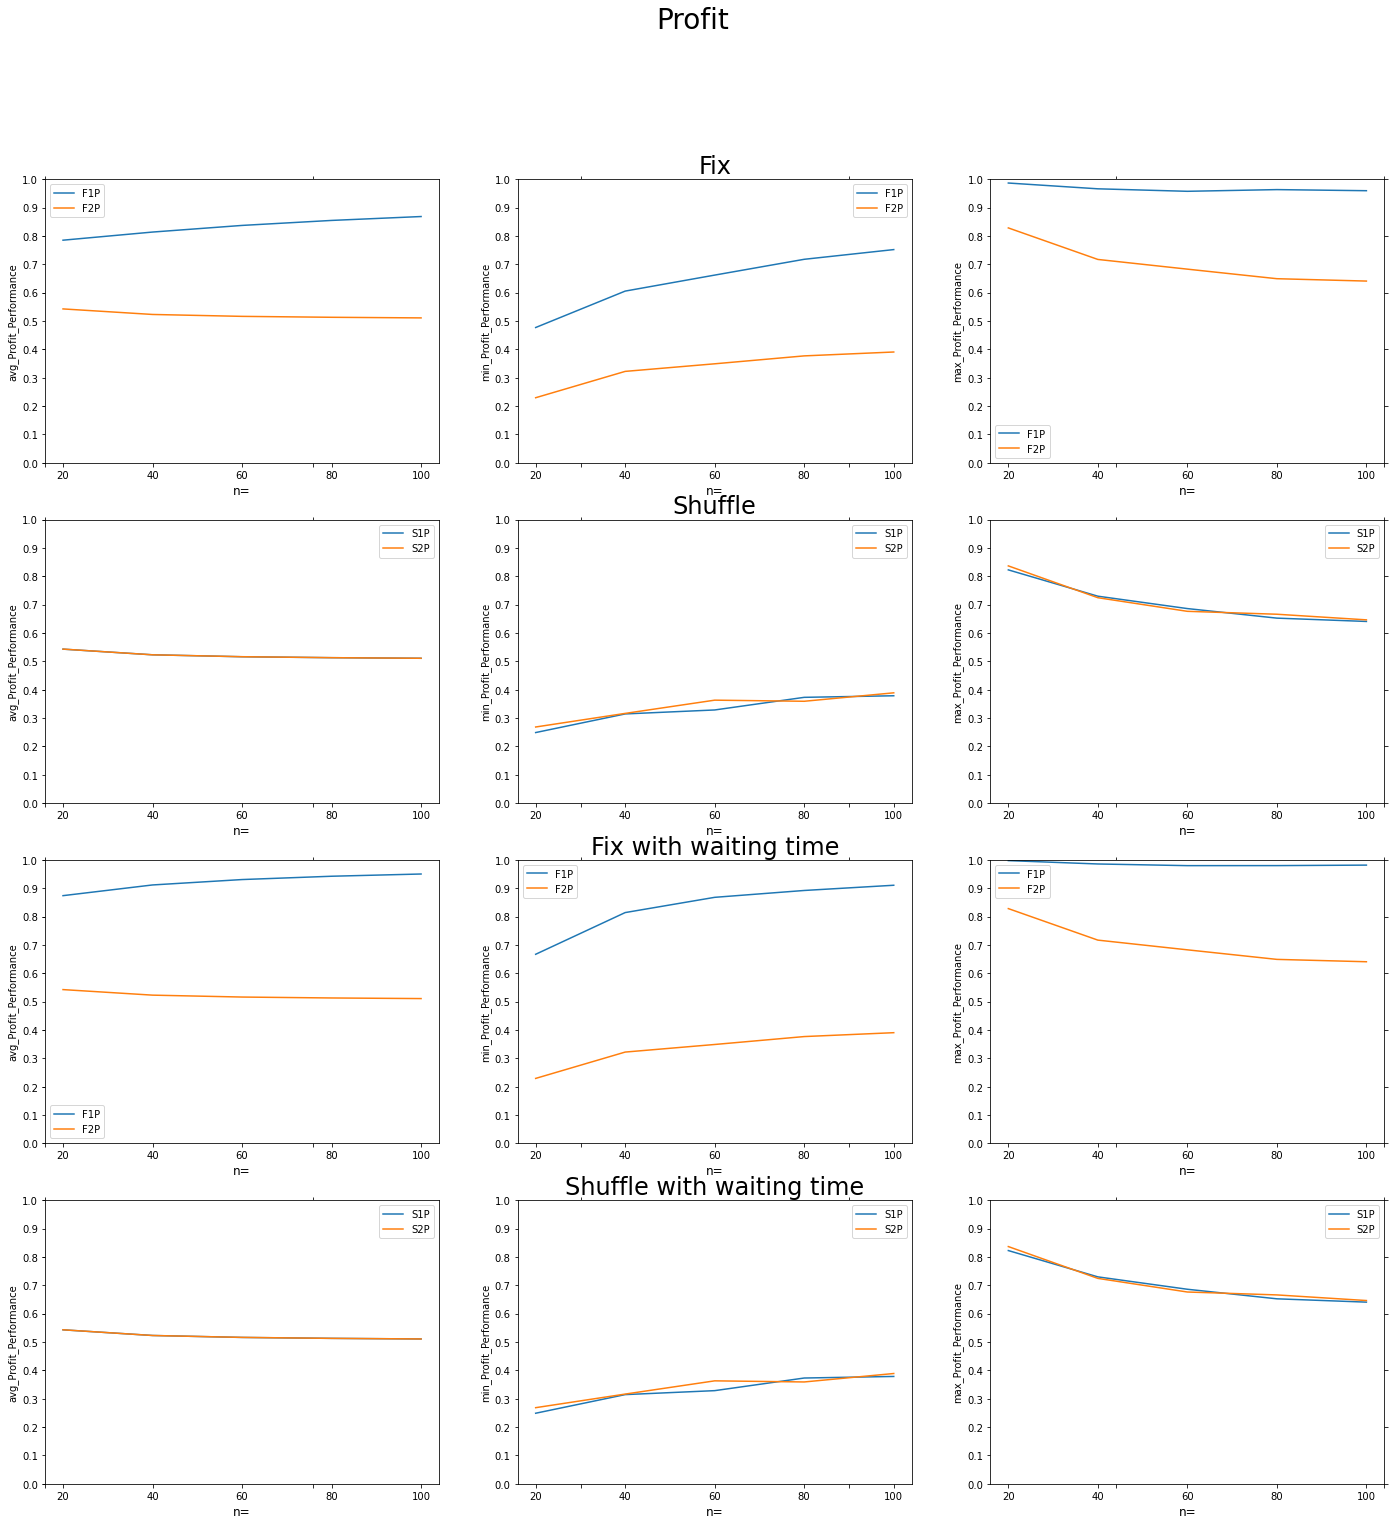

In [17]:
rows, cols = 4,3
titles = ['Fix', 'Shuffle', 'Fix with waiting time', 'Shuffle with waiting time']
fig, axarr = subplots_with_row_titles(rows, cols, figsize=(cols*8, rows*6), 
                                      row_titles=titles, 
                                      row_title_kw=dict(fontsize=24),
                                      sharex='row')
fig.suptitle('Profit',size=28)

#Fix
sns.lineplot(ax=axarr[0,0], x = summary_fix['n='], y = summary_fix['avg_Profit_Performance'], hue=summary_fix['ID'])
sns.lineplot(ax=axarr[0,1],x = summary_fix['n='], y = summary_fix['min_Profit_Performance'], hue=summary_fix['ID'])
sns.lineplot(ax=axarr[0,2],x = summary_fix['n='], y = summary_fix['max_Profit_Performance'], hue=summary_fix['ID'])
#Shuffle
sns.lineplot(ax=axarr[1,0], x = summary_shuffle['n='], y = summary_shuffle['avg_Profit_Performance'], hue=summary_shuffle['ID'])
sns.lineplot(ax=axarr[1,1],x = summary_shuffle['n='], y = summary_shuffle['min_Profit_Performance'], hue=summary_shuffle['ID'])
sns.lineplot(ax=axarr[1,2],x = summary_shuffle['n='], y = summary_shuffle['max_Profit_Performance'], hue=summary_shuffle['ID'])

#Fix Waiting
sns.lineplot(ax=axarr[2,0], x = summary_fix_w['n='], y = summary_fix_w['avg_Profit_Performance'], hue=summary_fix_w['ID'])
sns.lineplot(ax=axarr[2,1],x = summary_fix_w['n='], y = summary_fix_w['min_Profit_Performance'], hue=summary_fix_w['ID'])
sns.lineplot(ax=axarr[2,2],x = summary_fix_w['n='], y = summary_fix_w['max_Profit_Performance'], hue=summary_fix_w['ID'])

#Shuffle Waiting
sns.lineplot(ax=axarr[3,0], x = summary_shuffle_w['n='], y = summary_shuffle_w['avg_Profit_Performance'], hue=summary_shuffle_w['ID'])
sns.lineplot(ax=axarr[3,1],x = summary_shuffle_w['n='], y = summary_shuffle_w['min_Profit_Performance'], hue=summary_shuffle_w['ID'])
sns.lineplot(ax=axarr[3,2],x = summary_shuffle_w['n='], y = summary_shuffle_w['max_Profit_Performance'], hue=summary_shuffle_w['ID'])

for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        ax.set_ylim([0,1])
        ax.set_xticks([20,40,60,80,100])
        ax.set_yticks(np.arange(0,1.1,0.1))
        ax.set_xlabel('n=',fontsize='large')
        ax.legend()
        
plt.savefig(f'./results/profit.png')


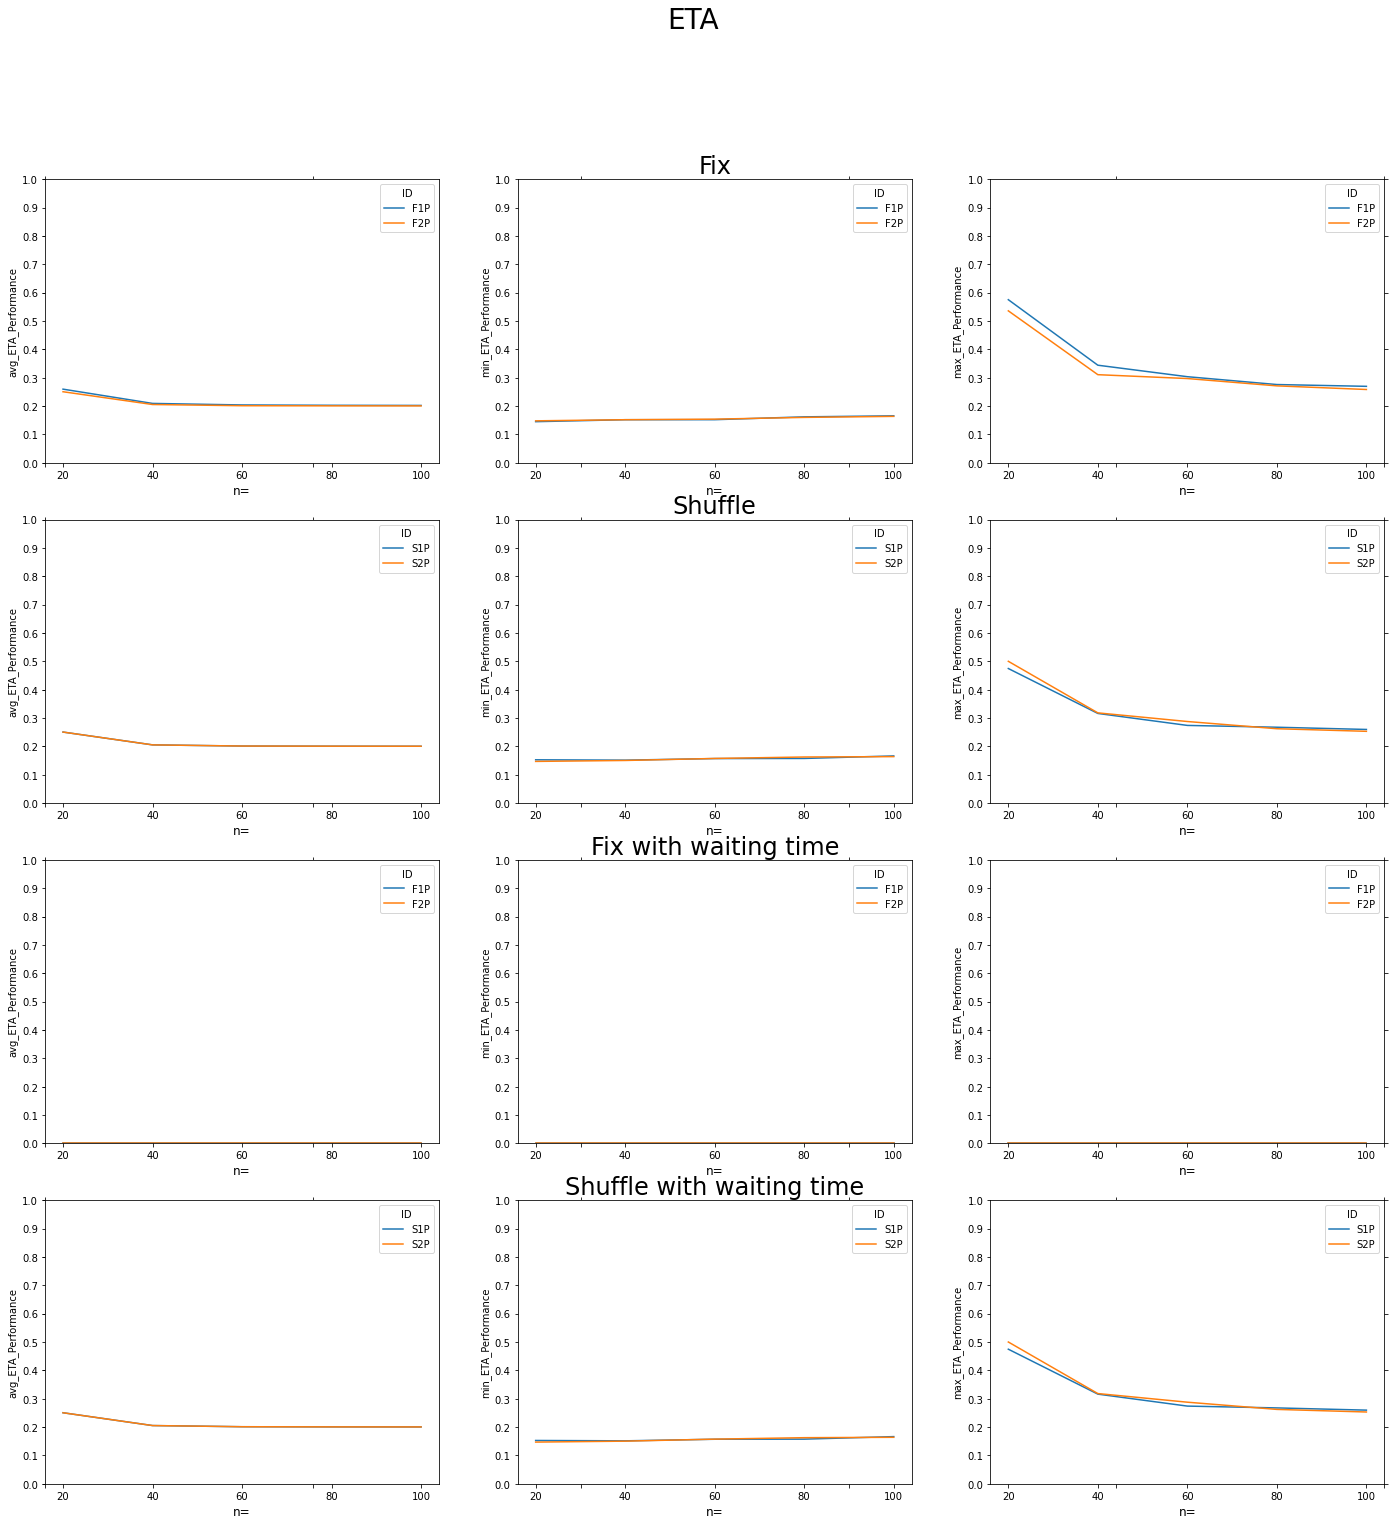

In [18]:
rows, cols = 4,3
titles = ['Fix', 'Shuffle', 'Fix with waiting time', 'Shuffle with waiting time']
fig, axarr = subplots_with_row_titles(rows, cols, figsize=(cols*8, rows*6), 
                                      row_titles=titles, 
                                      row_title_kw=dict(fontsize=24),
                                      sharex='row')
fig.suptitle('ETA',size=28)

#Fix
sns.lineplot(ax=axarr[0,0], x = summary_fix['n='], y = summary_fix['avg_ETA_Performance'], hue=summary_fix['ID'])
sns.lineplot(ax=axarr[0,1],x = summary_fix['n='], y = summary_fix['min_ETA_Performance'], hue=summary_fix['ID'])
sns.lineplot(ax=axarr[0,2],x = summary_fix['n='], y = summary_fix['max_ETA_Performance'], hue=summary_fix['ID'])

#Shuffle
sns.lineplot(ax=axarr[1,0], x = summary_shuffle['n='], y = summary_shuffle['avg_ETA_Performance'], hue=summary_shuffle['ID'])
sns.lineplot(ax=axarr[1,1],x = summary_shuffle['n='], y = summary_shuffle['min_ETA_Performance'], hue=summary_shuffle['ID'])
sns.lineplot(ax=axarr[1,2],x = summary_shuffle['n='], y = summary_shuffle['max_ETA_Performance'], hue=summary_shuffle['ID'])

#Fix Waiting
sns.lineplot(ax=axarr[2,0], x = summary_fix_w['n='], y = summary_fix_w['avg_ETA_Performance'], hue=summary_fix_w['ID'])
sns.lineplot(ax=axarr[2,1],x = summary_fix_w['n='], y = summary_fix_w['min_ETA_Performance'], hue=summary_fix_w['ID'])
sns.lineplot(ax=axarr[2,2],x = summary_fix_w['n='], y = summary_fix_w['max_ETA_Performance'], hue=summary_fix_w['ID'])

#Shuffle Waiting
sns.lineplot(ax=axarr[3,0], x = summary_shuffle_w['n='], y = summary_shuffle_w['avg_ETA_Performance'], hue=summary_shuffle_w['ID'])
sns.lineplot(ax=axarr[3,1],x = summary_shuffle_w['n='], y = summary_shuffle_w['min_ETA_Performance'], hue=summary_shuffle_w['ID'])
sns.lineplot(ax=axarr[3,2],x = summary_shuffle_w['n='], y = summary_shuffle_w['max_ETA_Performance'], hue=summary_shuffle_w['ID'])


for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        ax.set_ylim([0,1])
        ax.set_xticks([20,40,60,80,100])
        ax.set_yticks(np.arange(0,1.1,0.1))
        ax.set_xlabel('n=',fontsize='large')
        
plt.savefig(f'./results/eta.png')

In [19]:
def autolabel(rects,col):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,1.4*height,
                '%d' % int(height),
                ha='center', va='bottom', weight='bold', rotation=90)

NameError: name 'x' is not defined

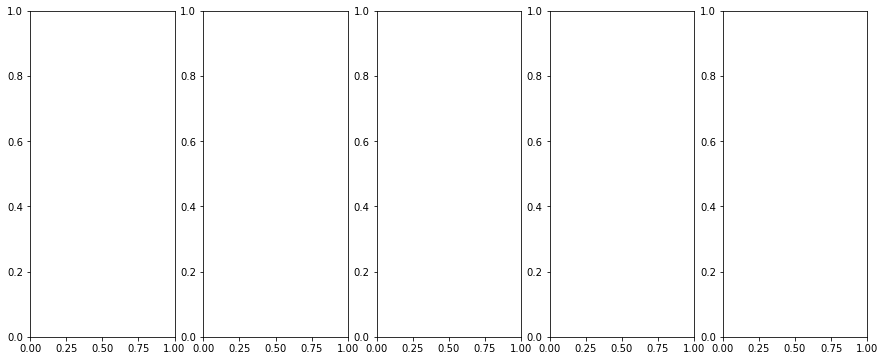

In [20]:
cols = 5
n = [20,40,60,80,100]
width = 0.25

fig, axarr = plt.subplots(1,5,figsize=(15,6))


for col in range(cols):
    ax = axarr[col]
    rects1 = ax.bar(x[0]-0.15, -F1D[col], width, label='F1D')
    rects2 = ax.bar(x[0]+0.15, -F2D[col], width, label='F2D')
    rects3 = ax.bar(x[1]-0.15, -S1D[col], width, label='S1D')
    rects4 = ax.bar(x[1]+0.15, -S2D[col], width, label='S2D')

    ax.set_ylabel('Blocking Pairs')
    ax.set_title('Blocking Pairs')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(-n[col]*(n[col]-1),0)
    ax.set_yticks(np.arange(0,-n[col]*(n[col]-1)-1,-n[col]*(n[col]-1)/5))
    ax.legend()
    ax.xaxis.set_ticks_position('top')
    
    autolabel(rects1,col)
    autolabel(rects2,col)
    autolabel(rects3,col)
    autolabel(rects4,col)

    
fig.tight_layout()
plt.savefig(f'./results/blocking_pairs.png')
plt.show()

In [ ]:
cols = 5
rows = 2
n = [20,40,60,80,100]
width = 0.25

fig, axarr = plt.subplots(2,5,figsize=(15,6))


for col in range(cols):
    ax = axarr[col]
    rects1 = ax.bar(x[0]-0.15, -F1D[col], width, label='F1D')
    rects2 = ax.bar(x[0]+0.15, -F2D[col], width, label='F2D')
    rects3 = ax.bar(x[1]-0.15, -S1D[col], width, label='S1D')
    rects4 = ax.bar(x[1]+0.15, -S2D[col], width, label='S2D')

    ax.set_ylabel('Blocking Pairs')
    ax.set_title('Blocking Pairs')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(-n[col]*(n[col]-1),0)
    ax.set_yticks(np.arange(0,-n[col]*(n[col]-1)-1,-n[col]*(n[col]-1)/5))
    ax.legend()
    ax.xaxis.set_ticks_position('top')
    
    autolabel(rects1,col)
    autolabel(rects2,col)
    autolabel(rects3,col)
    autolabel(rects4,col)

    
fig.tight_layout()
plt.savefig(f'./results/blocking_pairs.png')
plt.show()